<a href="https://colab.research.google.com/github/Mounyka/CODE-SOFT/blob/main/IRIS_FLOWER_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Iris Flower Dataset Exploration

We will investigate the well-known Iris flower dataset in this notebook and construct a classification neural network. Setosa, versicolor, and virginica are the three species of iris flowers that make up the well-known Iris dataset in machine learning. Our objective is to effectively train a neural network to identify iris flowers according to their sepal and petal properties.

Import the Libraries

We begin by loading the required libraries. Pandas will be used in this investigation to manipulate and explore the data.



In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Importing necessary modules from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# Importing TensorFlow and its relevant modules
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


In [5]:
#Upload the dataset file in the notebook
from google.colab import files
uploaded=files.upload()

Saving IRIS.csv to IRIS.csv


In [6]:
iris = pd.read_csv('IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Exploratory Data Analysis on Iris Dataset

We will examine an exploratory data analysis (EDA) of the Iris dataset in this part. Measurements of petal length, petal width, sepal length, and sepal width for three different species of iris flowers are included in the dataset.
Examining the dataset's general information, looking for any missing values, and learning more about the target variable's distribution comprise the first stage.
Then, for every species, we will compute descriptive statistics and provide mean values for various attributes. This will provide a thorough summary of the main trends in every category.
We will visualize a correlation matrix in order to investigate the links between various attributes in more detail. This matrix offers a useful insight into the relationships between variables.

In [7]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
# Count the occurrences of each unique value in the "species" column
iris["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [17]:
# Calculate the mean for each numeric column grouped by the 'species'
iris.groupby('species').mean()


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


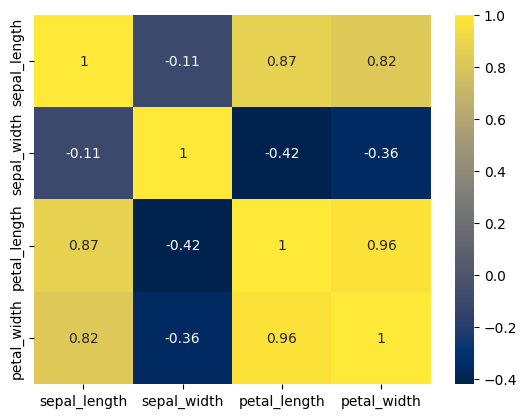

In [18]:
# Create a correlation matrix for selected columns
correlation_matrix = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()

# Display a heatmap of the correlation matrix with annotations, using the 'Greens' colormap
sns.heatmap(correlation_matrix, annot = True, cmap = 'cividis')

# Show the plot
plt.show()

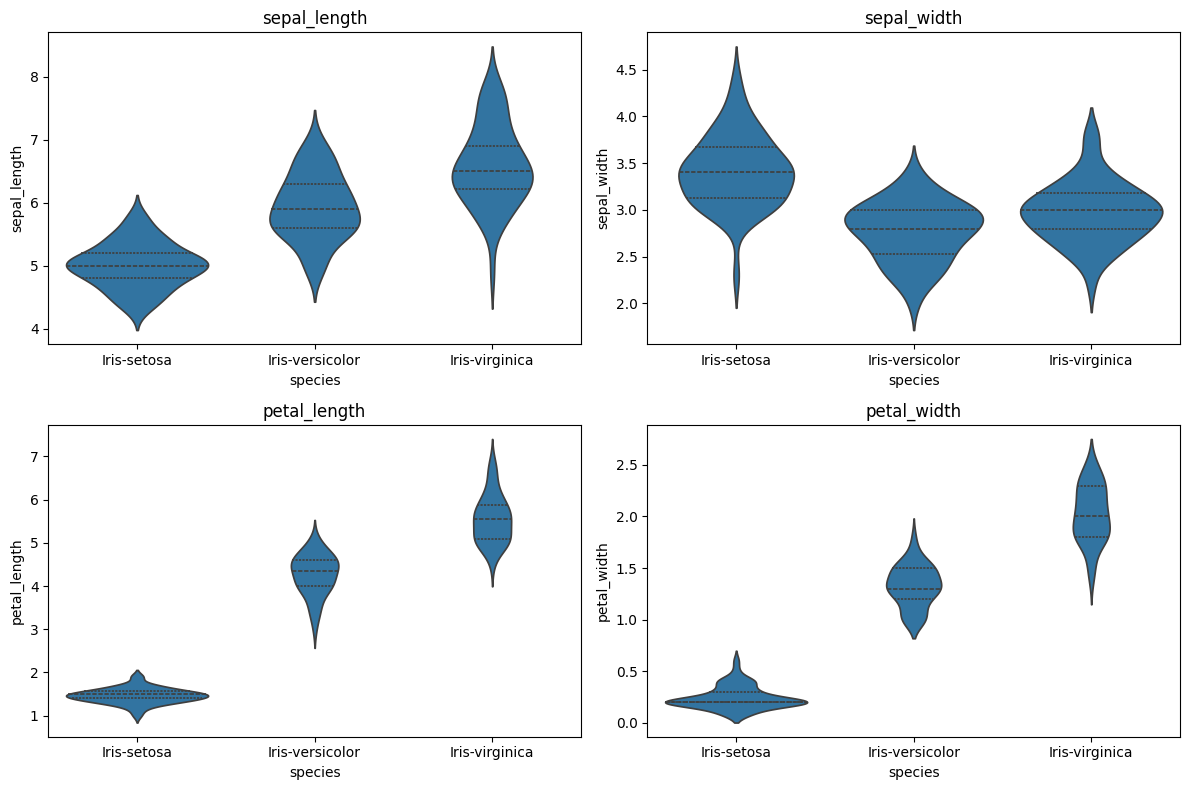

In [19]:
# Define the columns of interest
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Create subplots for violin plots
fig, axes = plt.subplots(2, 2, figsize = (12, 8))

# Plot violin plots for each column with respect to 'species'
for i, column in enumerate(columns):
    sns.violinplot(x = 'species', y = column, data = iris, inner = 'quartile', ax = axes[i//2, i%2])
    axes[i//2, i%2].set_title(column)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

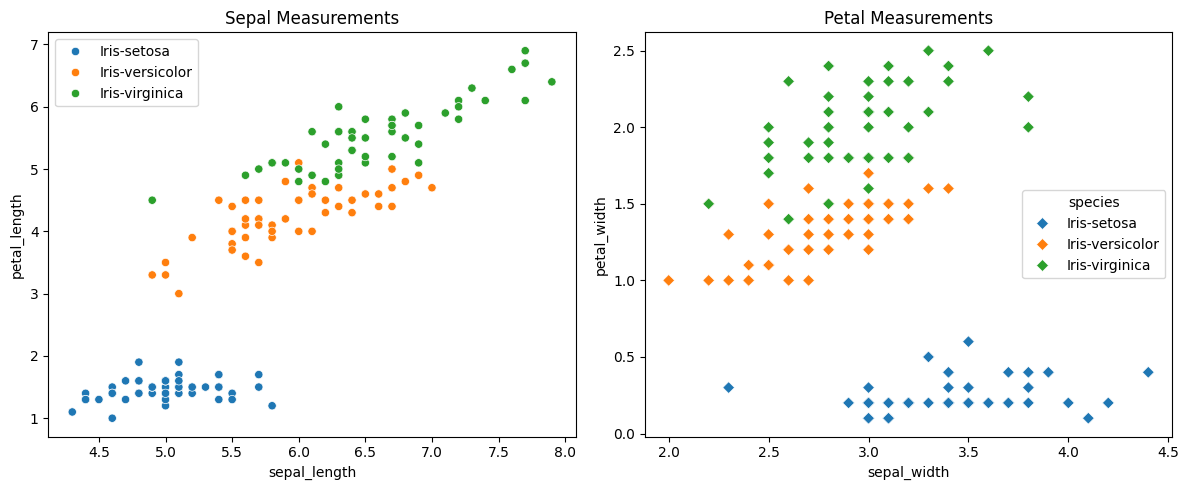

In [20]:
# Create subplots for scatter plots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))

# Scatter plot for sepal measurements
sns.scatterplot(x = 'sepal_length',
                y = 'petal_length',
                hue = 'species',
                marker = 'o',
                data = iris,
                ax = axes[0])
axes[0].set_title('Sepal Measurements')

# Scatter plot for petal measurements
sns.scatterplot(x = 'sepal_width',
                y = 'petal_width',
                hue = 'species',
                marker = 'D',
                data = iris,
                ax = axes[1])
axes[1].set_title('Petal Measurements')

# Display legend on the first plot
axes[0].legend()

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

#Data Preparation

In the data preparation phase, our focus is on readying the dataset for training and testing our machine learning model. The independent variables (features) are stored in the variable X, while the dependent variable (target) is stored in y. We then split the dataset into training and testing sets using the train_test_split function, allocating 20% of the data for testing and ensuring reproducibility by setting a random seed.

The size of the training and testing sets is printed for verification. To facilitate the model's understanding of the target variable, we use a Label Encoder to convert the categorical species labels into numerical format. Additionally, we employ Standard Scaling to standardize the feature values, ensuring that all features have a mean of 0 and a standard deviation of 1. This step is crucial for certain machine learning algorithms that are sensitive to the scale of input features.

In [21]:
# Split the dataset into features (X) and target variable (y)
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Display the sizes of the training and testing sets
print(f"X_train size: {X_train.shape}, y_train size: {y_train.shape}")
print(f"X_test size: {X_test.shape}, y_test size: {y_test.shape}")

X_train size: (120, 4), y_train size: (120,)
X_test size: (30, 4), y_test size: (30,)


In [22]:
# Encode the target variable using LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Standardize the feature variables using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Neural Network Approach:

To tackle the Iris flower classification task, we'll employ a neural network model using TensorFlow and Keras. Our neural network architecture consists of the following layers:

Layer 1 (Dense): 50 neurons with ReLU activation function.
Dropout Layer: Helps prevent overfitting by randomly dropping 30% of the connections.
Layer 2 (Dense): Another layer with 50 neurons and ReLU activation.
Dropout Layer: Again, dropout to enhance generalization.
Layer 3 (Dense): 20 neurons with ReLU activation.
Layer 4 (Dense): Final output layer with 3 neurons representing the three iris species.
Training: The model is compiled using Sparse Categorical Crossentropy loss and the Adam optimizer. It undergoes training for 100 epochs on the training data, with a 20% validation split. The training history is stored in the 'history' variable.

Model Summary: For a detailed overview of the Iris classification model, refer to the model summary.

Model Evaluation: Logits for both training and testing sets are computed, and predictions are obtained by applying the softmax function. These predictions can be further used to generate confusion matrices for evaluation purposes.

Let's dive into the training process and see how well our neural network can learn the patterns within the Iris dataset.

In [23]:
# Define the IrisModel class
class IrisModel(Model):
    def __init__(self):
        super().__init__()
        self.layer1 = Dense(50, activation = "relu", name = "L1")
        self.dropout1 = Dropout(0.3)
        self.layer2 = Dense(50, activation = "relu", name = "L2")
        self.dropout2 = Dropout(0.3)
        self.layer3 = Dense(20, activation = "relu", name = "L3")
        self.output_layer = Dense(3, activation = "linear", name = "L4")

    def call(self, inputs, training = False):
        x = self.layer1(inputs)
        x = self.dropout1(x, training = training)
        x = self.layer2(x)
        x = self.dropout2(x, training = training)
        x = self.layer3(x)
        return self.output_layer(x)

# Instantiate the model
iris_model = IrisModel()

# Compile the model
iris_model.compile(loss = SparseCategoricalCrossentropy(from_logits = True),
                   optimizer = Adam(learning_rate = 1e-3))

# Train the model and store the training history
history = iris_model.fit(X_train,
                         y_train,
                         epochs = 100,
                         validation_split = 0.2)


Epoch 1/100
3/3 [==============================] - 1s 58ms/step - loss: 1.1143 - val_loss: 1.0725
Epoch 2/100
3/3 [==============================] - 0s 10ms/step - loss: 1.0857 - val_loss: 1.0497
Epoch 3/100
3/3 [==============================] - 0s 13ms/step - loss: 1.0329 - val_loss: 1.0253
Epoch 4/100
3/3 [==============================] - 0s 11ms/step - loss: 1.0254 - val_loss: 1.0008
Epoch 5/100
3/3 [==============================] - 0s 11ms/step - loss: 0.9757 - val_loss: 0.9738
Epoch 6/100
3/3 [==============================] - 0s 11ms/step - loss: 0.9419 - val_loss: 0.9450
Epoch 7/100
3/3 [==============================] - 0s 10ms/step - loss: 0.9073 - val_loss: 0.9145
Epoch 8/100
3/3 [==============================] - 0s 10ms/step - loss: 0.8653 - val_loss: 0.8825
Epoch 9/100
3/3 [==============================] - 0s 10ms/step - loss: 0.8498 - val_loss: 0.8485
Epoch 10/100
3/3 [==============================] - 0s 11ms/step - loss: 0.7908 - val_loss: 0.8149
Epoch 11/100
3/3 [=

In [24]:
# Display a summary of the model architecture
iris_model.summary()

Model: "iris_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  multiple                  250       
                                                                 
 dropout_2 (Dropout)         multiple                  0         
                                                                 
 L2 (Dense)                  multiple                  2550      
                                                                 
 dropout_3 (Dropout)         multiple                  0         
                                                                 
 L3 (Dense)                  multiple                  1020      
                                                                 
 L4 (Dense)                  multiple                  63        
                                                                 
Total params: 3883 (15.17 KB)
Trainable params: 3883 (

In [25]:
# Generate logits for the training and testing sets
logits_X_train = iris_model(X_train)
logits_X_test = iris_model(X_test)

# Predicted labels based on softmax activation
y_train_hat = np.argmax(tf.nn.softmax(logits_X_train), axis = 1)
y_test_hat = np.argmax(tf.nn.softmax(logits_X_test), axis = 1)

#Model Evaluation:


We will be evaluating the Iris data classification model using a confusion matrix for prediction insights and accuracy calculation. Additionally, a loss graph over epochs will visually assess the model's learning progress.

Confusion Matrix: The confusion matrix for the Iris data classification model provides insights into its performance across three classes: Setosa, Versicolor, and Virginica. It outlines the true positive, true negative, false positive, and false negative predictions, offering a comprehensive view of classification accuracy.

                      **Predicted Positive** | **Predicted Negative** | **Predicted Neutral**
     Actual Positive |        True Positive |         False Negative |     False Positive
     Actual Negative |       False Positive |          True Negative |      False Negative
      Actual Neutral |        False Negative |         False Positive |       True Neutral


Accuracy Score: The accuracy score for the Iris data classification model is calculated by considering the sum of true positives, true negatives, and true neutrals divided by the total instances. This metric quantifies the overall correctness of the model's predictions across the three Iris classes.

          Accuracy =  True Positives + True Negatives + True Neutrals/Total Instances

Validation and Training Loss Over Epochs: To assess the model's training progress, it is useful to visualize the loss on both the training and validation sets over epochs.

X-axis: Epochs
Y-axis: Loss
The graph above depicts the training and validation loss over epochs. Ideally, both curves should be decreasing, indicating that the model is learning effectively. However, if the training loss continues to decrease while the validation loss starts to increase, it may indicate overfitting.

In [26]:
# Display training metrics
print("Train Metrics ---------------> \n")

# Calculate and print accuracy for the training set
train_accuracy = accuracy_score(y_train_hat, y_train)
print(f"Accuracy Score: {(train_accuracy * 100):.2f}%\n")

# Print the confusion matrix for the training set
train_confusion_matrix = confusion_matrix(y_train_hat, y_train)
print(f"Confusion Matrix:\n{train_confusion_matrix}\n")

# Display testing metrics
print("\nTest Metrics --------------->\n")

# Calculate and print accuracy for the testing set
test_accuracy = accuracy_score(y_test_hat, y_test)
print(f"Accuracy Score: {(test_accuracy * 100):.2f}%\n")

# Print the confusion matrix for the testing set
test_confusion_matrix = confusion_matrix(y_test_hat, y_test)
print(f"Confusion Matrix:\n{test_confusion_matrix}")

Train Metrics ---------------> 

Accuracy Score: 96.67%

Confusion Matrix:
[[39  0  0]
 [ 0 33  0]
 [ 0  4 44]]


Test Metrics --------------->

Accuracy Score: 100.00%

Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [27]:
# Create a scatter plot for training and validation loss over epochs using Plotly
trace_train = go.Scatter(x = list(range(1, len(history.history['loss']) + 1)),
                        y=history.history['loss'],
                        mode = 'lines',
                        name = 'Training Loss')

trace_val = go.Scatter(x = list(range(1, len(history.history['val_loss']) + 1)),
                      y = history.history['val_loss'],
                      mode = 'lines',
                      name = 'Validation Loss')

layout = go.Layout(title = 'Training and Validation Loss Over Epochs',
                   xaxis = dict(title = 'Epochs'),
                   yaxis = dict(title = 'Loss'),
                   legend = dict(x = 0.7, y = 1))

fig = go.Figure(data = [trace_train, trace_val],
                layout = layout)

# Show the plot
fig.show()

#Conclusion

In conclusion, the Iris data classification model has demonstrated impressive performance with accuracy scores of 96.67% on the training set and a perfect 100% on the testing set. The confusion matrix provides detailed insights into the model's predictions across different classes, offering a comprehensive understanding of its classification accuracy. These results showcase the model's ability to generalize well to new, unseen data.